
## Unsupervised Learning in Machine Learning - Clustering

In this notebook you will get familiar with K means clustering algorithm using PyCaret python package. First lets dive through PyCaret clustering functions along dummy dataset.




# **Import libraries**

In [ ]:
!pip install pycaret # install pycaret this way if you are running this notebook in google colab environment.

In [1]:
from pycaret.clustering import * #importing pycaret clustering module
import plotly.express as px

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs # to generate new datasets/dummy dataset


# **Make simple dummy dataset for clustering**


In [ ]:
# create points on 4 clusters
# X contains the features (coordinates) of the generated data points, while y contains the corresponding cluster labels for each data point.
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=1.5)

In [ ]:
X

array([[ 7.43854060e+00,  2.68391907e+00],
       [-6.43881528e+00,  1.02471399e+01],
       [-8.85669792e+00,  5.97764136e+00],
       [-1.10104543e+01,  5.21232725e+00],
       [-7.76367433e+00, -5.60570645e+00],
       [-5.75868678e+00, -5.96455420e+00],
       [ 4.35133739e+00,  2.42549070e+00],
       [-9.54488522e+00,  7.67159782e+00],
       [ 4.24289359e+00,  6.05342343e+00],
       [-5.66033401e+00, -5.93566633e+00],
       [-8.27002290e+00, -6.96939763e+00],
       [ 4.98106874e+00,  3.93388382e+00],
       [ 6.26445570e+00,  3.55387276e+00],
       [-7.60767251e+00, -6.75729838e+00],
       [-9.91734107e+00, -6.60042812e+00],
       [-8.12311971e+00, -7.72038115e+00],
       [-2.61721281e+00,  1.05195855e+01],
       [-1.00716583e+01,  7.68905373e+00],
       [-5.85023691e+00, -9.29918340e+00],
       [-4.50060197e+00, -8.73683284e+00],
       [-3.69639290e+00, -5.33141170e+00],
       [-7.59204516e+00, -7.86010344e+00],
       [-8.35424992e+00,  6.08267650e+00],
       [-2.

In [ ]:
y

array([1, 0, 3, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2,
       3, 0, 3, 0, 0, 2, 0, 1, 2, 2, 3, 3, 0, 1, 3, 1, 3, 0, 2, 0, 2, 2,
       3, 1, 1, 2, 1, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 1, 3, 1, 2, 3, 3, 2,
       1, 0, 3, 0, 0, 3, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 3, 3, 3, 0,
       1, 3, 2, 0, 1, 1, 1, 3, 0, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 2, 2, 3,
       1, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 2, 1, 3, 3, 1, 0, 1, 1, 0, 2, 2,
       0, 3, 3, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 3, 1, 3,
       2, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 2, 1, 1, 2, 1, 3, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 0, 2, 3, 3, 0, 3, 1, 0,
       2, 1])

<Axes: >

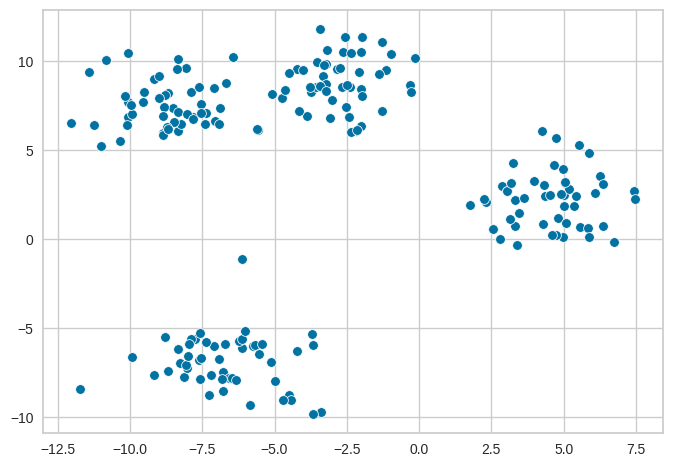

In [ ]:
# visualize the example data

# call that function to draw a scatterplot
sns.scatterplot(x=X[:,0], y=X[:,1], palette='viridis')
#X[:,0] selects the values from the first column of the X array. The first column typically represents the first feature of the dataset.
#y=X[:,1]: This specifies the y-axis values for the scatter plot. Similarly, X[:,1] selects the values from the second column of the X array. The second column typically represents the second feature of the dataset.

Exercise 1.

---

1.   Create a new dataset that has 180 samples, 5 clusters, 3 features and
standard deviation is 1,2. Use random_state=42
2.   Plot the first and third features of the data


In [ ]:
# Ex1 a)

In [ ]:

#You can check solution from https://github.com/thilinib/CBM101/blob/main/E_Macine_Learning/solutions/pyc_1a.py


In [ ]:
# Ex1 b)

In [ ]:

#You can check solution from https://github.com/thilinib/CBM101/blob/main/E_Macine_Learning/solutions/pyc_1b.py


# **Pycaret**
Pycaret is a low-code and beginner-friendly machine learning (ML) library in Python that automates and speeds up the ML-workflow. Pycaret replaces hundreds of lines of code with only a few.

# **Clustering in Pycaret**
* PyCaret's clustering module provides several pre-processing features that can be configured when initializing the setup through the **`setup()`** function.

* It has several algorithms and plots to analyze the results. PyCaret's clustering module also implements a unique function called **`tune_model()` ** that allows you to tune the hyperparameters of a clustering model to optimize a supervised learning objective such as R^2 for regression.

* **`setup()`** is Pycaret's main function and it needs to be run before executing any other function in pycaret. The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

* When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment.

* These tasks are performed differently for each data type which means it is very important for them to be correctly configured.




In [ ]:
# setup() has lots of optional parameters for e.g. preprocessing, but let's run it with defaults
s = setup(X)

,Description,Value
0,Session id,7412
1,Original data shape,"(180, 3)"
2,Transformed data shape,"(180, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# pycaret offers many clustering algorithms we can compare
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


# **Create a model**
Next let's create and train a **kmeans model**. Without additional parameters it will use **4 clusters** as default but if you know the number of clusters beforehand you can pass it using num_clusters parameter. In this case we know there is supposed to be 5 clusters and we're gonna use that.

In [ ]:
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5871,1314.0585,0.6198,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


# **Silhouette Coefficient/silhouette score**
Pycaret will print some useful metrics.

**Silhouette Coefficient** or **silhouette score** is a metric used to calculate the goodness of a clustering technique.
* Its value ranges from -1 to 1.
* 1 means that clusters are well apart
from each other and clearly distinguished,
* 0 means that clusters are indifferent ie. the distance between clusters is not significant,
* -1 means that clusters are assigned in the wrong way.

We can plot silhouette scores per cluster and get validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. In other words, the silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

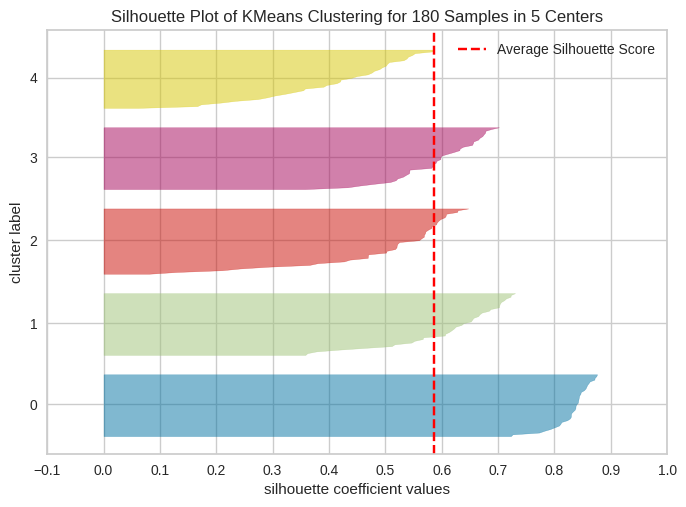

In [ ]:
plot_model(kmeans, plot = 'silhouette')


# **Elbow method**
Another useful method is the **elbow method**, which is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.

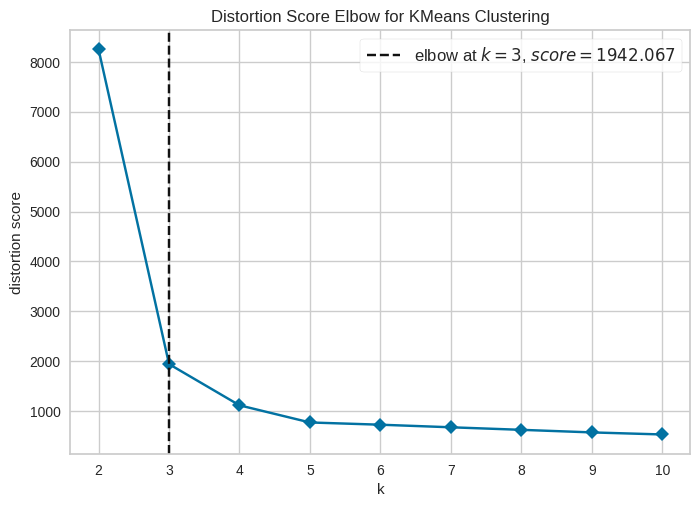

In [ ]:
plot_model(kmeans, plot = 'elbow')

In this example the Elbow plot above suggests that 3 is the optimal number of clusters. Usually there is a clear angle, elbow, in the distortion scores, and that cutoff point is where adding another cluster doesn't give much better modeling of the data. You can use this suggestion to create a new model, but in this case we know there should be 5 clusters and we used that previously so we're not gonna create another model.

# **Centroids**
The model here is a python object, and can thus have certain attributes, such as the centroids locations:

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 4.3946075, -9.525808 ,  9.558765 ],
       [-2.4740505,  8.863021 ,  4.501099 ],
       [ 2.3920732, -6.9456806, -6.375912 ],
       [-8.718878 ,  7.4437304,  2.2895489],
       [ 6.635913 , -5.875166 , -6.3360353]], dtype=float32)

<Axes: >

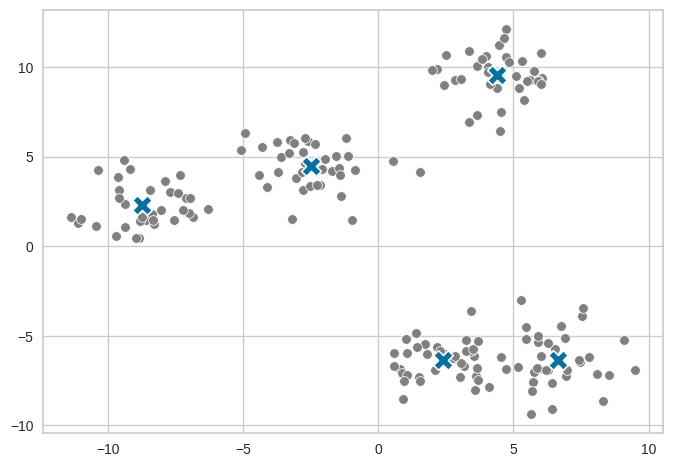

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 2], color='gray')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 2], s=200, marker="X") # this time for the centroids of the clusters.
#x=centroids[:, 0] specifies that the x-coordinates of the centroids will be taken from the first column of the centroids array.
#y=centroids[:, 1] specifies that the y-coordinates of the centroids will be taken from the second column of the centroids array.
#s=200 sets the size of the markers

# **Plot the model results**
The **`plot_model()`** function can be used to analyze different aspects of the clustering model. This function takes a trained model object and returns a plot. See examples below:

PCA plot

In [ ]:
plot_model(kmeans, plot = 'cluster') #cluster is default

# **Distribution plot**
The distribution plot shows the size of each cluster. When hovering over the bars you will see the number of samples assigned to each cluster. We can also use the distribution plot to see the distribution of cluster labels in association with any other numeric or categorical feature. Features are column names of your dataframe, but in this case feature_1 has been autogenerated since column names weren't passed. See an example below:

In [ ]:
plot_model(kmeans, plot = 'distribution', feature='feature_2') # you can check with feature_1 as well

# **Compare to original clusters**
Normally you wouldn't be able to compare clusters since you don't have anything to compare. In this case we know the original clusters and we can therefore compare kmeans results to them.

Predicted clusters are saved in the model object:

In [ ]:
pred = kmeans.labels_
pred

array([1, 4, 1, 0, 4, 3, 2, 4, 1, 2, 1, 4, 3, 1, 2, 4, 0, 3, 0, 3, 4, 0,
       3, 4, 2, 3, 1, 3, 3, 0, 4, 0, 3, 0, 3, 1, 1, 2, 1, 0, 1, 1, 3, 4,
       2, 2, 1, 4, 4, 3, 0, 2, 4, 3, 3, 0, 0, 3, 3, 2, 2, 3, 2, 2, 2, 3,
       1, 4, 1, 3, 0, 2, 4, 0, 2, 1, 0, 2, 2, 0, 0, 0, 3, 4, 3, 4, 0, 1,
       2, 3, 0, 4, 4, 1, 4, 0, 4, 1, 2, 3, 2, 1, 4, 1, 3, 1, 1, 2, 3, 2,
       0, 0, 0, 1, 1, 0, 2, 2, 3, 0, 3, 2, 1, 1, 0, 0, 0, 3, 4, 4, 1, 2,
       3, 0, 4, 2, 1, 0, 1, 4, 0, 2, 0, 4, 4, 2, 2, 4, 0, 2, 1, 3, 0, 1,
       4, 3, 2, 4, 2, 4, 4, 2, 3, 0, 2, 4, 3, 0, 3, 1, 4, 1, 1, 2, 1, 3,
       1, 2, 3, 2], dtype=int32)

[Text(0.5, 1.0, 'Predicted clusters')]

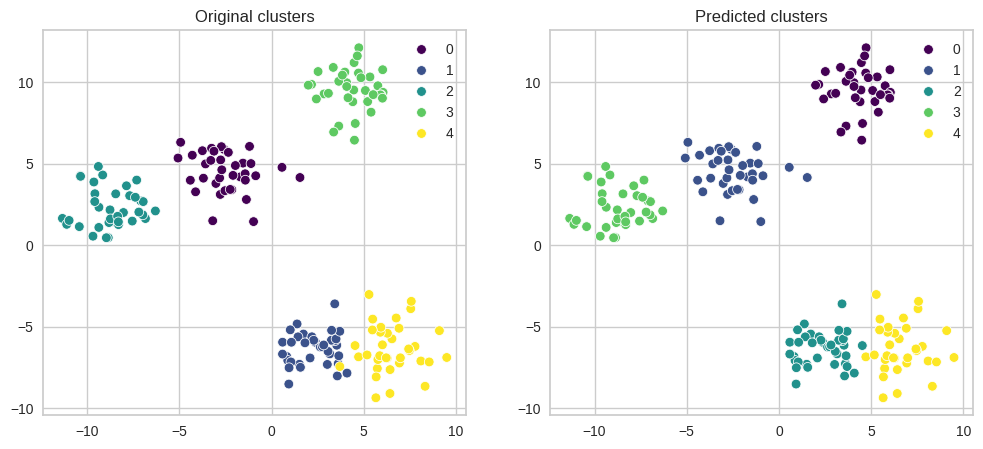

In [ ]:
# figure size
plt.figure(figsize=(12,5))

# original clusters with first and 3rd feature
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:,0], y=X[:,2],hue=y, palette='viridis').set(title='Original clusters')

# predicted clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:,0], y=X[:,2],hue=pred, palette='viridis').set(title='Predicted clusters')

# **Exercise 2.**

---


Calculate how well predicted clusters match the originals.

In [ ]:
#Ex2

In [ ]:

#you can check solution from https://github.com/thilinib/CBM101/blob/main/E_Macine_Learning/solutions/pyc_2.py


# **Exercise 3.**

---


Create another model (run model() to see available models) and see if it can predict clusters better than kmeans.